In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
atl_zips = pd.read_csv("atl_zips.csv")
atl_zips.zipcode = atl_zips.zipcode.astype('int')

In [5]:
crime = pd.read_csv("crime_counts.csv") # for testing

In [6]:
atl_zips

,zipcode
0,30305
1,30314
2,30313
3,30316
4,30315
5,30318
6,30317
7,30319
8,30310
9,30354


In [7]:
atl_zip_shp = gpd.read_file('tl_2020_us_zcta520.dbf')

In [8]:
atl_zip_shp

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.6539, -88.24713 33.6541..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.3496, -86.81648 34.3496..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."
...,...,...,...,...,...,...,...,...,...,...
33786,10540,10540,B5,G6350,S,1394970,27777,+41.3259819,-073.7277119,"POLYGON ((-73.7358 41.33577, -73.73501 41.3358..."
33787,23081,23081,B5,G6350,S,7753698,14654483,+37.1935699,-076.7525080,"POLYGON ((-76.79774 37.21409, -76.79134 37.220..."
33788,23147,23147,B5,G6350,S,143646,0,+37.3696361,-077.0391136,"POLYGON ((-77.04292 37.36996, -77.04143 37.370..."
33789,23298,23298,B5,G6350,S,288664,0,+37.5417074,-077.4295300,"POLYGON ((-77.43284 37.54038, -77.43262 37.540..."


In [9]:
atl_zip_shp.rename(columns = {'GEOID20':'zipcode'}, inplace = True)
atl_zip_shp.zipcode = atl_zip_shp.zipcode.astype('int')

filtered_atl_zip_shp = atl_zip_shp[atl_zip_shp['zipcode'].isin(atl_zips['zipcode'])].reset_index()

In [95]:
city_shp = gpd.read_file('city_shape.shx')

In [ ]:
#newplot2= data.overlay(atl_city_zip_shp, how="intersection")

In [103]:
zip_shp= filtered_atl_zip_shp.overlay(city_shp, how="intersection")

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:2675: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.overlay(
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 9 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


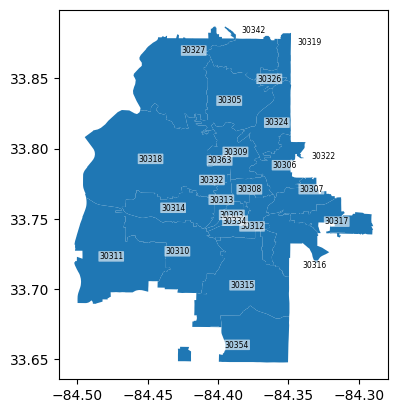

In [104]:
ax = zip_shp.plot()

for x, y, label in zip(filtered_atl_zip_shp.INTPTLAT20.astype(float),
                       filtered_atl_zip_shp.INTPTLON20.astype(float),
                       filtered_atl_zip_shp.zipcode.astype(str)):
    ax.annotate(label,
               xy=(y, x),
               xytext=(0, 0),
               textcoords="offset points",
               ha='center',
               va='center',
               fontsize=5.5,
               bbox=dict(
                   boxstyle='round,pad=0.1',
                   facecolor='white',
                   edgecolor='none',
                   alpha=0.6
               ))


In [98]:
zip_crime = pd.merge(zip_shp, crime, on='zipcode')

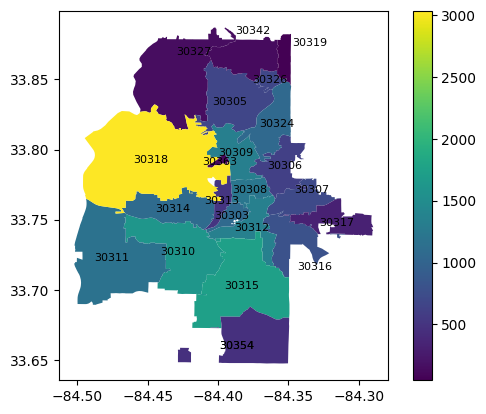

In [100]:
ax = zip_crime.plot(column= 'crime_count',legend=True)

for x, y, label in zip(zip_crime.INTPTLAT20.astype('float'), zip_crime.INTPTLON20.astype('float'), zip_crime.zipcode.astype('str')):
  ax.annotate(label, xy=(y,x), xytext=(0, 0), textcoords="offset points", ha = 'center', va = 'center',fontsize = 8)

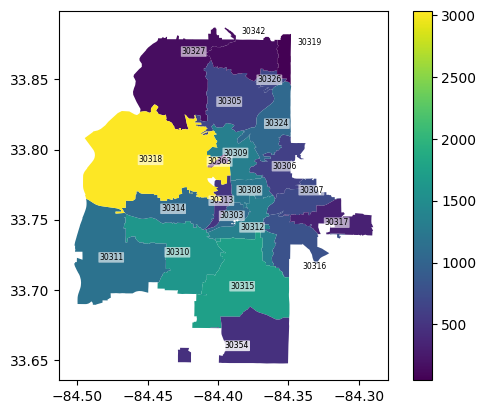

In [99]:
ax = zip_crime.plot(column='crime_count', legend=True)

for x, y, label in zip(zip_crime.INTPTLAT20.astype(float),
                       zip_crime.INTPTLON20.astype(float),
                       zip_crime.zipcode.astype(str)):
    ax.annotate(label,
               xy=(y, x),
               xytext=(0, 0),
               textcoords="offset points",
               ha='center',
               va='center',
               fontsize=5.5,
               bbox=dict(
                   boxstyle='round,pad=0.1',
                   facecolor='white',
                   edgecolor='none',
                   alpha=0.6
               ))